In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('/kaggle/input/pakistans-top-100-tiktokers/Pakistan Top 100 TikTokers .csv')

In [3]:
data1.sample(15)

,"UserId,Name,Videos,Fans,Views,Account"
52,"https://www.tiktok.com/@meerjangikhanrais,Meer..."
14,"https://www.tiktok.com/@supari2222,Zafar supar..."
49,"https://www.tiktok.com/@rubiali110,Rubi Ali,92..."
70,"https://www.tiktok.com/@sharjeel_awish01,Sharj..."
8,"https://www.tiktok.com/@areeka__haq,Areeka,""1,..."
89,"https://www.tiktok.com/@durdanaeimaan,Dolphin?..."
57,"https://www.tiktok.com/@aqeel1khan556,A K,""1,3..."
34,"https://www.tiktok.com/@mehmood_j,???? Mehmood..."
33,"https://www.tiktok.com/@paridoll16,paridoll16,..."
62,"https://www.tiktok.com/@mian_sunnyy,mian_sunny..."


# Data Cleaning 

In [4]:
data1 = data1['UserId,Name,Videos,Fans,Views,Account'].str.split(',', expand=True)

In [5]:
data1.columns = ["0", "1", "2", "3", "4", "5", "6", "7"]

In [6]:
data1.drop(columns=['2'],axis=1, inplace=True)

In [7]:
data1

,0,1,3,4,5,6,7
0,https://www.tiktok.com/@jannatmirza,J M ????,"212""",13.6M,2.15B,"""Pakistan","2018-03-18"""
1,https://www.tiktok.com/@kanwal.135,Kanwalay????,"039""",11.6M,962.74M,"""Pakistan","2018-09-22"""
2,https://www.tiktok.com/@ch.zulqarnain25,Zulqarnain Sikandar,"573""",11.4M,2.15B,"""Pakistan","2018-07-20"""
3,https://www.tiktok.com/@alishbahanjum,Lishay,"238""",11.2M,751.86M,"""Pakistan","2016-06-25"""
4,https://www.tiktok.com/@hoormahaveera,Hoor Mahaveera,"240""",10.6M,183.86M,"""Pakistan","2017-03-06"""
...,...,...,...,...,...,...,...
95,https://www.tiktok.com/@bilaljani5,Chento????,"784""",1.8M,543.57M,"""Pakistan","2018-08-05"""
96,https://www.tiktok.com/@hammadmalik74,hammadmalik74,"745""",1.8M,266.38M,"""Pakistan","2018-11-06"""
97,https://www.tiktok.com/@laibakhanofficial,laiba khan,1.8M,59.98M,"""Pakistan","2018-12-06""",None
98,https://www.tiktok.com/@zehraqureshi00,Zehra,"885""",1.8M,138.63M,"""Pakistan","2019-08-14"""


In [8]:
data1.rename(columns={'0':'User_ID','1':'Name','3':'Videos','4':'Followers','5':'Views','6':'Country','7':'Date_Created'},
             inplace=True)

In [9]:
data1.sample(10)

,User_ID,Name,Videos,Followers,Views,Country,Date_Created
86,https://www.tiktok.com/@m.momin_mughal44,m.momin_mughal44,"481""",1.9M,77.23M,"""Pakistan","2019-09-13"""
68,https://www.tiktok.com/@siddiquiboss,Aman Ullah Siddiqui,"686""",2.3M,331.59M,"""Pakistan","2018-08-07"""
94,https://www.tiktok.com/@saqibsagheerkhan,Saqib sagheerkhan,"436""",1.8M,96.34M,"""Pakistan","2019-07-30"""
47,https://www.tiktok.com/@alifaisaljutt,Ali Faisal Jutt,"281""",2.9M,488.23M,"""Pakistan","2018-12-09"""
88,https://www.tiktok.com/@skpvibes,Waheed Skpvibes,"610""",1.9M,22.03M,"""Pakistan","2020-01-17"""
67,https://www.tiktok.com/@ali_khanking,Ali Khan ????,2.3M,110.23M,"""Pakistan","2019-01-13""",None
20,https://www.tiktok.com/@asadaliofficiall,Asad ali |????????,"865""",5.1M,383.3M,"""Pakistan","2019-05-12"""
30,https://www.tiktok.com/@amnasabir2,A M N A S A B I R ✅,"177""",3.7M,170.97M,"""Pakistan","2018-08-07"""
6,https://www.tiktok.com/@nadeemmubarakofficial,NADEEM MUBARAK,"969""",8.5M,310.98M,"""Pakistan","2019-07-19"""
12,https://www.tiktok.com/@harrisali_01,Harris Ali,"530""",5.9M,801.57M,"""Pakistan","2018-07-06"""


In [10]:
data1['User_ID'] = data1['User_ID'].replace({'https://www.tiktok.com/@':' '}, regex=True)
data1['Videos'] = data1['Videos'].replace({'"':''}, regex=True)
data1['Country'] = data1['Country'].replace({'"':''}, regex=True)
data1['Date_Created'] = data1['Date_Created'].replace({'"':''},regex=True)

In [11]:
data1.sample(15)

,User_ID,Name,Videos,Followers,Views,Country,Date_Created
55,mjahsan20,Muhammad Ahsan Shafqat,406,2.6M,94.37M,Pakistan,2017-06-08
22,zeeshanrokhari6970,Zeeshan Rokhri,030,4.7M,89.5M,Pakistan,2019-07-14
82,musahussain5,Musa Hussain,1.9M,263.81M,"""Pakistan",2019-04-26,None
46,irfanmuhammad480,محمّد عرفان,3M,53.23M,"""Pakistan",2019-07-13,None
62,mian_sunnyy,mian_sunnyy,339,2.4M,435.23M,Pakistan,2017-12-25
94,saqibsagheerkhan,Saqib sagheerkhan,436,1.8M,96.34M,Pakistan,2019-07-30
10,sehar_hayyat,Sehar Hayyat,076,7.3M,2.15B,Pakistan,2018-03-14
9,mehakmalikofficial578,Mehak Malik official,604,7.8M,1.94B,Pakistan,2019-01-18
48,shaizraj,Shaiz Raj,130,2.8M,226.76M,Pakistan,2019-01-27
99,sallubhai223,Salahuddin Khan,885,1.8M,136.19M,Pakistan,2019-06-29


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       100 non-null    object
 1   Name          100 non-null    object
 2   Videos        100 non-null    object
 3   Followers     100 non-null    object
 4   Views         100 non-null    object
 5   Country       100 non-null    object
 6   Date_Created  74 non-null     object
dtypes: object(7)
memory usage: 5.6+ KB


In [13]:
data1.dtypes

User_ID         object
Name            object
Videos          object
Followers       object
Views           object
Country         object
Date_Created    object
dtype: object

In [14]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 1000000000.0


In [15]:
data1['Followers'] = data1['Followers'].apply(value_to_float)
data1['Views'] = data1['Views'].apply(value_to_float)

data1.sample(20)


,User_ID,Name,Videos,Followers,Views,Country,Date_Created
81,nayyab_kiani1,Nayyab Kiani,1.9M,15130000.0,1.000000e+09,2017-12-23,None
16,mujtabalakhani123,mujtaba Lakhani,138,5300000.0,6.316000e+08,Pakistan,2018-03-17
10,sehar_hayyat,Sehar Hayyat,076,7300000.0,2.150000e+09,Pakistan,2018-03-14
15,asadrayofficial,ASAD RAY,314,5400000.0,5.830000e+08,Pakistan,2018-11-10
33,paridoll16,paridoll16,942,3600000.0,7.447300e+08,Pakistan,2018-03-30
95,bilaljani5,Chento????,784,1800000.0,5.435700e+08,Pakistan,2018-08-05
55,mjahsan20,Muhammad Ahsan Shafqat,406,2600000.0,9.437000e+07,Pakistan,2017-06-08
21,romaisa.khan._,Romaisa Khan,041,5000000.0,3.490800e+08,Pakistan,2016-10-18
35,adil_raajput,Adil Raajput,926,3600000.0,4.943400e+08,Pakistan,2018-11-09
51,kainat_faisal,kainat Faisal,2.7M,112150000.0,1.000000e+09,2019-03-09,None


In [16]:
data1.sample(15)

,User_ID,Name,Videos,Followers,Views,Country,Date_Created
36,sofiakaif,Sofia Kaif,015,3500000.0,2.218200e+08,Pakistan,2018-05-18
3,alishbahanjum,Lishay,238,11200000.0,7.518600e+08,Pakistan,2016-06-25
6,nadeemmubarakofficial,NADEEM MUBARAK,969,8500000.0,3.109800e+08,Pakistan,2019-07-19
47,alifaisaljutt,Ali Faisal Jutt,281,2900000.0,4.882300e+08,Pakistan,2018-12-09
78,nimi_ansari,nimra Ansari,048,2000000.0,1.731000e+08,Pakistan,2018-12-10
61,jalaluddin6,Jalal Uddin,113,2400000.0,2.928100e+08,Pakistan,2018-07-27
89,durdanaeimaan,Dolphin????,006,1900000.0,2.075700e+08,Pakistan,2018-06-20
66,mehreenkhokhar1,Momeeeh,666,2400000.0,1.340100e+08,Pakistan,2018-09-01
42,ushab_rajpoot,????,3.1M,101380000.0,1.000000e+09,2018-12-11,None
86,m.momin_mughal44,m.momin_mughal44,481,1900000.0,7.723000e+07,Pakistan,2019-09-13


In [17]:
data2 = data1[data1['Date_Created'].isnull()]
data2

,User_ID,Name,Videos,Followers,Views,Country,Date_Created
19,rabeecak,Rabeecakashif,5.1M,96640000.0,1.000000e+09,2018-08-31,None
24,aliriaz84,Ali Riaz ♠️ ????,4.4M,182250000.0,1.000000e+09,2019-11-25,None
26,arooba_khann,Arooba,4.1M,155340000.0,1.000000e+09,2018-10-02,None
29,adeelmurtaza,AD,3.9M,414100000.0,1.000000e+09,2018-02-14,None
39,basitrind5,Abdul Basit,3.3M,182740000.0,1.000000e+09,2018-11-21,None
41,akhroot,Haris Khan,3.1M,400600000.0,1.000000e+09,2018-03-23,None
42,ushab_rajpoot,????,3.1M,101380000.0,1.000000e+09,2018-12-11,None
45,mishalhearts,MISHAL HEARTS (مشعل بٹ),3M,345240000.0,1.000000e+09,2018-07-07,None
46,irfanmuhammad480,محمّد عرفان,3M,53230000.0,1.000000e+09,2019-07-13,None
49,rubiali110,Rubi Ali,2.8M,226280000.0,1.000000e+09,2018-08-09,None


In [18]:
data3 = pd.concat([data1,data2])

In [19]:
data3

,User_ID,Name,Videos,Followers,Views,Country,Date_Created
0,jannatmirza,J M ????,212,13600000.0,2.150000e+09,Pakistan,2018-03-18
1,kanwal.135,Kanwalay????,039,11600000.0,9.627400e+08,Pakistan,2018-09-22
2,ch.zulqarnain25,Zulqarnain Sikandar,573,11400000.0,2.150000e+09,Pakistan,2018-07-20
3,alishbahanjum,Lishay,238,11200000.0,7.518600e+08,Pakistan,2016-06-25
4,hoormahaveera,Hoor Mahaveera,240,10600000.0,1.838600e+08,Pakistan,2017-03-06
...,...,...,...,...,...,...,...
83,sanabutt660,Sanabutt660,1.9M,87650000.0,1.000000e+09,2018-10-01,None
85,real_umerkaraxhii,Real_@Umer KaraxHii,1.9M,121780000.0,1.000000e+09,2017-10-02,None
91,shaheer._.khan1,Shaheer khan,1.9M,199350000.0,1.000000e+09,2019-06-26,None
92,juttbahadr,Jutt bahader,1.9M,342600000.0,1.000000e+09,2018-12-14,None


In [20]:
data1.isnull().sum()

User_ID          0
Name             0
Videos           0
Followers        0
Views            0
Country          0
Date_Created    26
dtype: int64

In [21]:
data1.dropna(inplace=True)

In [22]:
data1.sample(20)

,User_ID,Name,Videos,Followers,Views,Country,Date_Created
15,asadrayofficial,ASAD RAY,314,5400000.0,5.830000e+08,Pakistan,2018-11-10
27,atiyakiyani1234,Atiya kayani,372,4100000.0,5.465700e+08,Pakistan,2019-05-05
80,mahirani_official,"""""""Mahi"""" ????""",103,1900000.0,1.486700e+08,Pakistan,2018-04-23
16,mujtabalakhani123,mujtaba Lakhani,138,5300000.0,6.316000e+08,Pakistan,2018-03-17
44,wardamalik94,Warda Malik,113,3100000.0,1.421400e+08,Pakistan,2019-05-19
8,areeka__haq,Areeka,046,8100000.0,1.450000e+09,Pakistan,2018-06-18
60,rabiakhan806,rabia Khan,825,2500000.0,1.203100e+08,Pakistan,2019-10-29
48,shaizraj,Shaiz Raj,130,2800000.0,2.267600e+08,Pakistan,2019-01-27
3,alishbahanjum,Lishay,238,11200000.0,7.518600e+08,Pakistan,2016-06-25
68,siddiquiboss,Aman Ullah Siddiqui,686,2300000.0,3.315900e+08,Pakistan,2018-08-07


In [23]:
data3['Videos'] = data1['Videos'].astype(int)
data3['Date_Created'] = pd.to_datetime(data3['Date_Created'])

In [24]:
data3['Year'] = data3['Date_Created'].dt.year
data3['Month'] = data3['Date_Created'].dt.month

In [25]:
data3

,User_ID,Name,Videos,Followers,Views,Country,Date_Created,Year,Month
0,jannatmirza,J M ????,212.0,13600000.0,2.150000e+09,Pakistan,2018-03-18,2018.0,3.0
1,kanwal.135,Kanwalay????,39.0,11600000.0,9.627400e+08,Pakistan,2018-09-22,2018.0,9.0
2,ch.zulqarnain25,Zulqarnain Sikandar,573.0,11400000.0,2.150000e+09,Pakistan,2018-07-20,2018.0,7.0
3,alishbahanjum,Lishay,238.0,11200000.0,7.518600e+08,Pakistan,2016-06-25,2016.0,6.0
4,hoormahaveera,Hoor Mahaveera,240.0,10600000.0,1.838600e+08,Pakistan,2017-03-06,2017.0,3.0
...,...,...,...,...,...,...,...,...,...
83,sanabutt660,Sanabutt660,NaN,87650000.0,1.000000e+09,2018-10-01,NaT,NaN,NaN
85,real_umerkaraxhii,Real_@Umer KaraxHii,NaN,121780000.0,1.000000e+09,2017-10-02,NaT,NaN,NaN
91,shaheer._.khan1,Shaheer khan,NaN,199350000.0,1.000000e+09,2019-06-26,NaT,NaN,NaN
92,juttbahadr,Jutt bahader,NaN,342600000.0,1.000000e+09,2018-12-14,NaT,NaN,NaN


In [26]:
data3.dropna(inplace=True)

In [27]:
data3['follow_per_vids'] = data3['Followers'] / data3['Videos']

In [28]:
data3['views_per_vids'] = data3['Views'] / data3['Videos']

In [29]:
data3

,User_ID,Name,Videos,Followers,Views,Country,Date_Created,Year,Month,follow_per_vids,views_per_vids
0,jannatmirza,J M ????,212.0,13600000.0,2.150000e+09,Pakistan,2018-03-18,2018.0,3.0,64150.943396,1.014151e+07
1,kanwal.135,Kanwalay????,39.0,11600000.0,9.627400e+08,Pakistan,2018-09-22,2018.0,9.0,297435.897436,2.468564e+07
2,ch.zulqarnain25,Zulqarnain Sikandar,573.0,11400000.0,2.150000e+09,Pakistan,2018-07-20,2018.0,7.0,19895.287958,3.752182e+06
3,alishbahanjum,Lishay,238.0,11200000.0,7.518600e+08,Pakistan,2016-06-25,2016.0,6.0,47058.823529,3.159076e+06
4,hoormahaveera,Hoor Mahaveera,240.0,10600000.0,1.838600e+08,Pakistan,2017-03-06,2017.0,3.0,44166.666667,7.660833e+05
...,...,...,...,...,...,...,...,...,...,...,...
94,saqibsagheerkhan,Saqib sagheerkhan,436.0,1800000.0,9.634000e+07,Pakistan,2019-07-30,2019.0,7.0,4128.440367,2.209633e+05
95,bilaljani5,Chento????,784.0,1800000.0,5.435700e+08,Pakistan,2018-08-05,2018.0,8.0,2295.918367,6.933291e+05
96,hammadmalik74,hammadmalik74,745.0,1800000.0,2.663800e+08,Pakistan,2018-11-06,2018.0,11.0,2416.107383,3.575570e+05
98,zehraqureshi00,Zehra,885.0,1800000.0,1.386300e+08,Pakistan,2019-08-14,2019.0,8.0,2033.898305,1.566441e+05


In [30]:
data3['Year'] = data3['Year'].astype(int)
data3['Month'] = data3['Month'].astype(int)

In [31]:
data1 = data3

# Preprocessed Dataset

In [32]:
data1.sample(20) 

,User_ID,Name,Videos,Followers,Views,Country,Date_Created,Year,Month,follow_per_vids,views_per_vids
36,sofiakaif,Sofia Kaif,15.0,3500000.0,2.218200e+08,Pakistan,2018-05-18,2018,5,233333.333333,1.478800e+07
57,aqeel1khan556,A K,317.0,2600000.0,7.251900e+08,Pakistan,2019-06-22,2019,6,8201.892744,2.287666e+06
9,mehakmalikofficial578,Mehak Malik official,604.0,7800000.0,1.940000e+09,Pakistan,2019-01-18,2019,1,12913.907285,3.211921e+06
61,jalaluddin6,Jalal Uddin,113.0,2400000.0,2.928100e+08,Pakistan,2018-07-27,2018,7,21238.938053,2.591239e+06
18,hussaintareen,Hussain Tareen,382.0,5200000.0,3.323700e+08,Pakistan,2018-05-04,2018,5,13612.565445,8.700785e+05
11,aalleey,Ali Fayyaz,599.0,6500000.0,8.133300e+08,Pakistan,2018-10-01,2018,10,10851.419032,1.357813e+06
84,nabeelkhokhar66,nabeelkhokhar66 ????,743.0,1900000.0,2.403500e+08,Pakistan,2018-04-27,2018,4,2557.200538,3.234859e+05
33,paridoll16,paridoll16,942.0,3600000.0,7.447300e+08,Pakistan,2018-03-30,2018,3,3821.656051,7.905839e+05
0,jannatmirza,J M ????,212.0,13600000.0,2.150000e+09,Pakistan,2018-03-18,2018,3,64150.943396,1.014151e+07
40,umairchaudhry3,Umair Chaudhry,141.0,3200000.0,2.965200e+08,Pakistan,2019-03-29,2019,3,22695.035461,2.102979e+06


In [33]:
data1.shape

(74, 11)

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_ID          74 non-null     object        
 1   Name             74 non-null     object        
 2   Videos           74 non-null     float64       
 3   Followers        74 non-null     float64       
 4   Views            74 non-null     float64       
 5   Country          74 non-null     object        
 6   Date_Created     74 non-null     datetime64[ns]
 7   Year             74 non-null     int64         
 8   Month            74 non-null     int64         
 9   follow_per_vids  74 non-null     float64       
 10  views_per_vids   74 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 6.9+ KB


In [35]:
data1.describe()

,Videos,Followers,Views,Year,Month,follow_per_vids,views_per_vids
count,74.00000,7.400000e+01,7.400000e+01,74.000000,74.000000,74.000000,7.400000e+01
mean,414.22973,4.124324e+06,5.089109e+08,2018.297297,6.675676,33077.714730,3.664103e+06
std,286.39108,2.787094e+06,4.935745e+08,0.735215,2.970670,62731.672333,7.360407e+06
min,6.00000,1.800000e+06,2.203000e+07,2016.000000,1.000000,2033.898305,3.611475e+04
25%,140.25000,2.125000e+06,1.757900e+08,2018.000000,4.250000,4471.101829,5.356134e+05
50%,377.00000,3.100000e+06,3.350450e+08,2018.000000,7.000000,10237.065426,1.160605e+06
75%,621.25000,5.175000e+06,7.017925e+08,2019.000000,9.000000,21463.580667,2.310422e+06
max,990.00000,1.360000e+07,2.150000e+09,2020.000000,12.000000,316666.666667,3.459500e+07


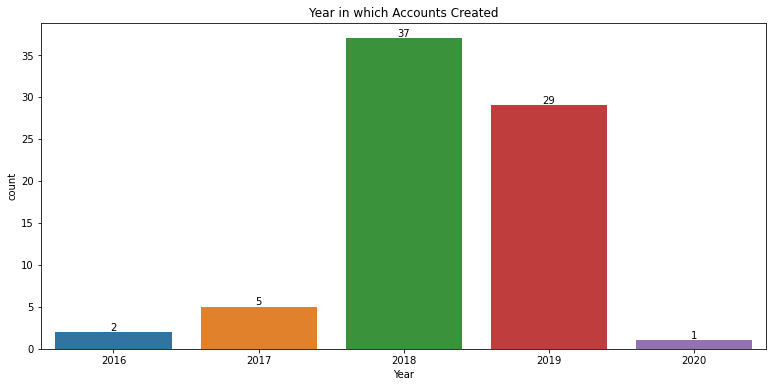

In [36]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='Year', data = data1)
ax.bar_label(ax.containers[0])
plt.title('Year in which Accounts Created')
plt.show()

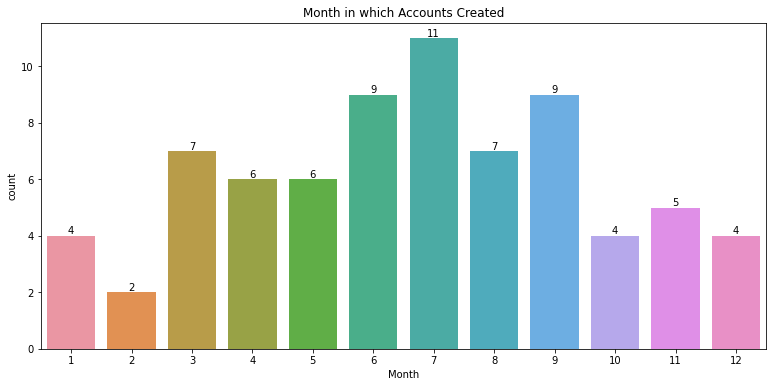

In [37]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='Month', data = data1)
ax.bar_label(ax.containers[0])
plt.title('Month in which Accounts Created')
plt.show()

In [38]:
def plot(xCol,title):
    plt.figure(figsize=(13,9))
    ax = sns.barplot(x=xCol, y='User_ID', data=data1.nlargest(15, xCol))
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

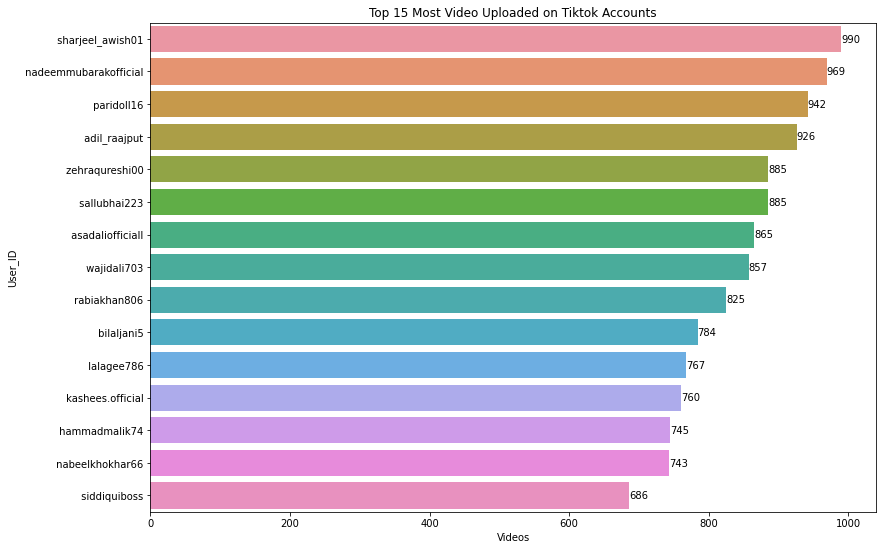

In [39]:
plot('Videos','Top 15 Most Video Uploaded on Tiktok Accounts')

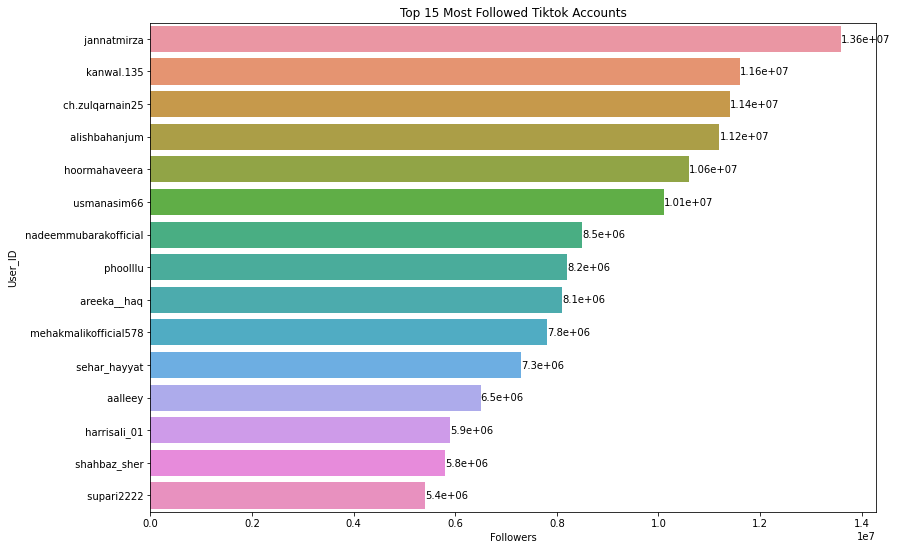

In [40]:
plot('Followers','Top 15 Most Followed Tiktok Accounts')

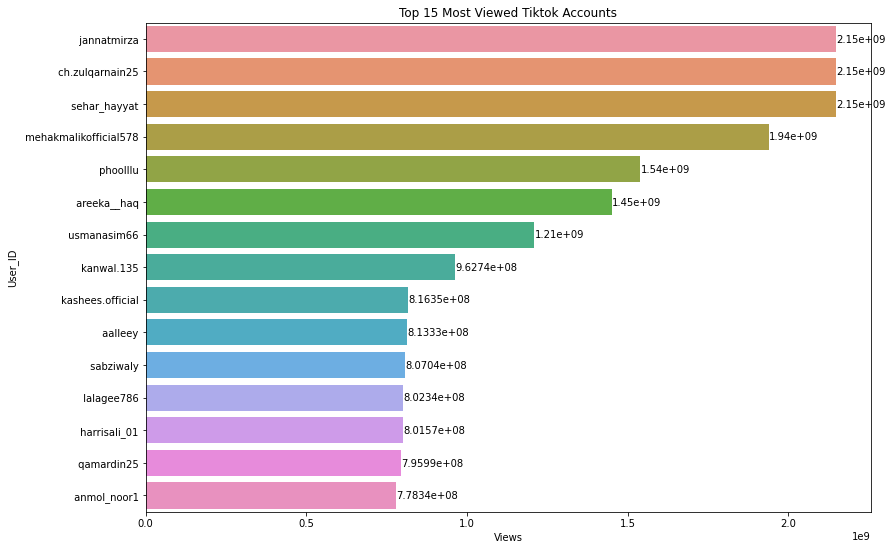

In [41]:
plot('Views','Top 15 Most Viewed Tiktok Accounts')

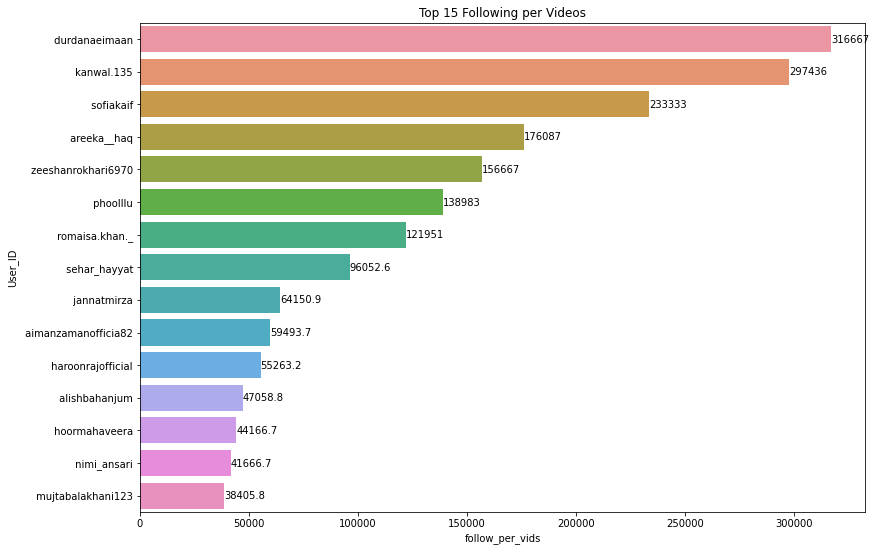

In [42]:
plot('follow_per_vids','Top 15 Following per Videos')

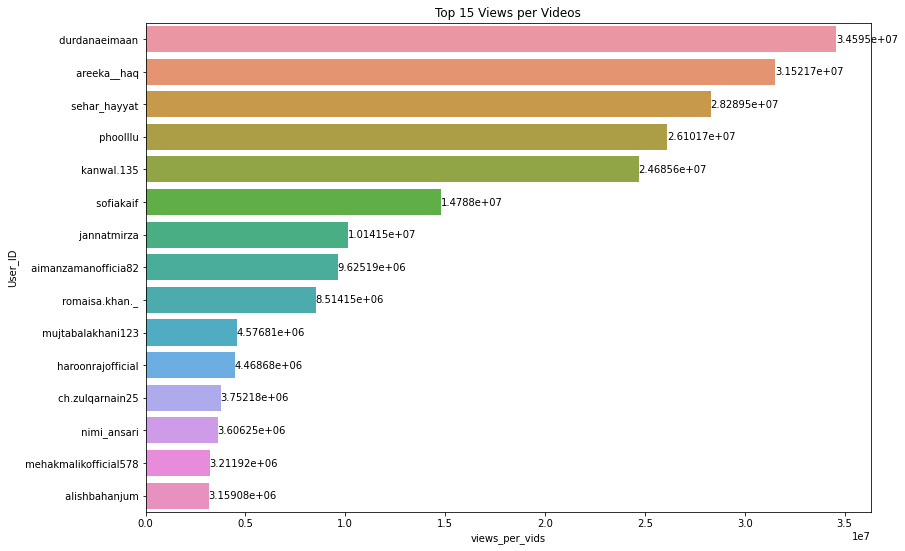

In [43]:
plot('views_per_vids','Top 15 Views per Videos')